In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import preprocessing

# Límite Superior de Confianza

In [3]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "c:\\Users\\jrgui\\Documents\\GitHub\\Machine_Learning\\Aprendizaje_por_Refuerzo\\datasets\\Ads_CTR_Optimisation.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


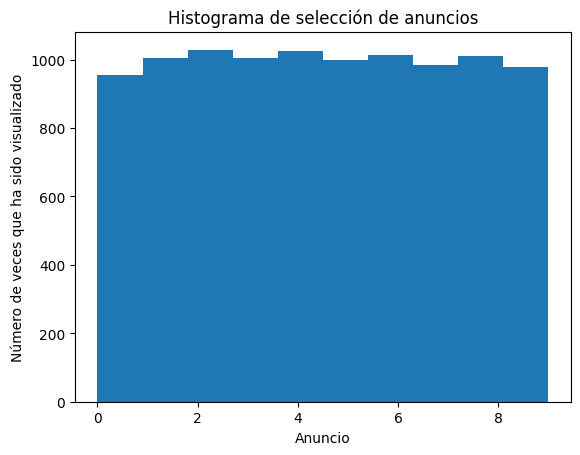

In [4]:
#Para obtener una muestra aleatoria de los datos
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

# Visualizar los resultados - Histograma
plt.hist(ads_selected)
plt.title('Histograma de selección de anuncios')
plt.xlabel('Anuncio')
plt.ylabel('Número de veces que ha sido visualizado')
plt.show()

1